In [ ]:
# import a few important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
import io

In [ ]:
!git clone https://github.com/hastagAB/Healthcare-Fraud-Analysis.git

Cloning into 'Healthcare-Fraud-Analysis'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 20 (delta 4), reused 15 (delta 3), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [ ]:
# Load Dataset
Train = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Train.csv")
Train_Beneficiary = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Train_Beneficiary_Data.csv")
Train_Inpatient = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Train_Inpatient_Data.csv")
Train_Outpatient = pd.read_csv("Healthcare-Fraud-Analysis/dataset/Train_Outpatient_Data.csv")

In [ ]:
Train_Outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


## Distribute how many providers are fraudulent & non-fraudulent

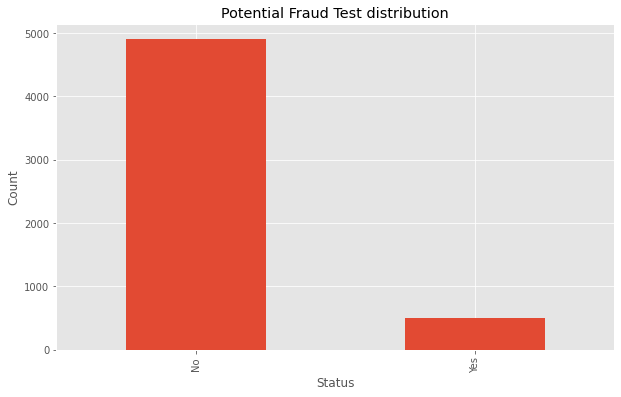

In [ ]:
plt.title("Potential Fraud Test distribution")
Train.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# INPATIENT (The patients that are admitted to the hospital)

# Inpatient Procedure Distribution

Let's try to find out some of the most common procedure that the impatients opt for

In [ ]:
procedures =  pd.DataFrame(columns = ['Procedures'])
procedures['Procedures'] = pd.concat([
                                          Train_Inpatient["ClmProcedureCode_1"], 
                                          Train_Inpatient["ClmProcedureCode_2"], 
                                          Train_Inpatient["ClmProcedureCode_3"], 
                                          Train_Inpatient["ClmProcedureCode_4"], 
                                          Train_Inpatient["ClmProcedureCode_5"], 
                                          Train_Inpatient["ClmProcedureCode_6"]
                                          ], axis=0, sort=True).dropna()
                            
procedures.head(10)
procedure_group = procedures['Procedures'].value_counts()

procedure_g1 = procedure_group.to_frame()
procedure_g1.columns = ['count']
procedure_g1['Procedure'] = procedure_g1.index
procedure_g1['Percentage'] = (procedure_g1['count']/sum(procedure_g1['count']))*100

In [ ]:
procedure_g1.head(5)

,count,Procedure,Percentage
4019.0,1953,4019.0,6.577529
9904.0,1137,9904.0,3.829314
2724.0,1047,2724.0,3.526202
8154.0,1021,8154.0,3.438637
66.0,894,66.0,3.010912


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


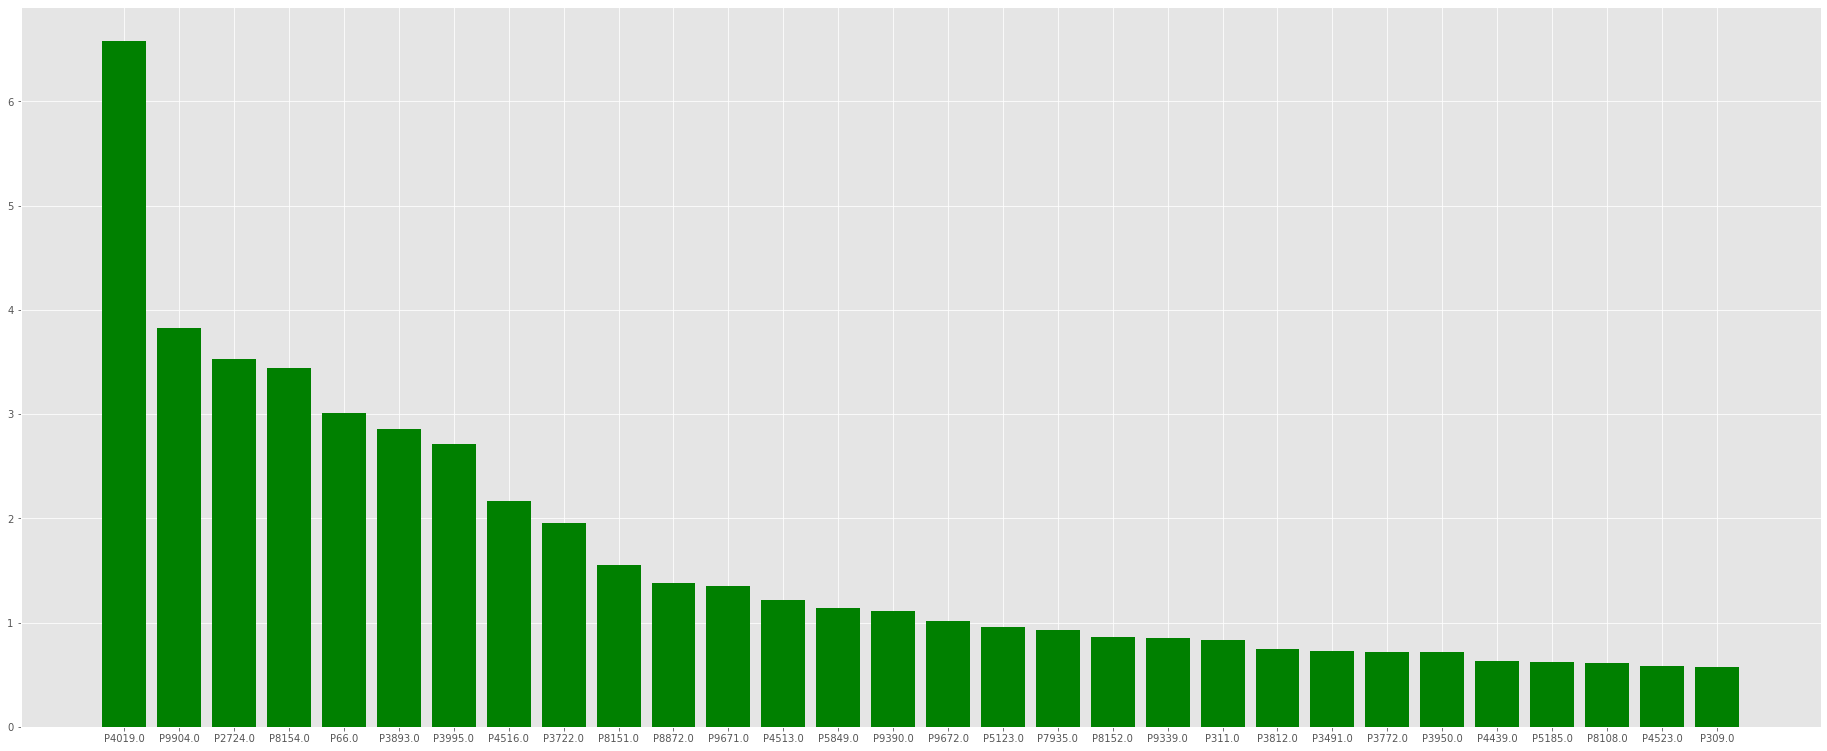

In [ ]:
plot_procedure = procedure_g1.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_procedure['Procedure'] = 'P' + plot_procedure['Procedure'].astype(str)
plot_procedure.sort_values(by=['Percentage'])
ax.bar(plot_procedure['Procedure'],plot_procedure['Percentage'], color='green')
plt.show()

We see that for inpatinet the most common procedure used is 4019, 9904, 2724 among others.

# Inpatient Diagnosis Distribution

Let's do the same for diagnosis and try to find which of them are the most common ones.

In [ ]:
diagnosis =  pd.DataFrame(columns = ['diagnosis'])
diagnosis['diagnosis'] = pd.concat([
                                          Train_Inpatient["ClmDiagnosisCode_1"], 
                                          Train_Inpatient["ClmDiagnosisCode_2"], 
                                          Train_Inpatient["ClmDiagnosisCode_3"], 
                                          Train_Inpatient["ClmDiagnosisCode_4"],
                                          Train_Inpatient["ClmDiagnosisCode_5"],
                                          Train_Inpatient["ClmDiagnosisCode_6"],
                                          Train_Inpatient["ClmDiagnosisCode_7"],
                                          Train_Inpatient["ClmDiagnosisCode_8"], 
                                          Train_Inpatient["ClmDiagnosisCode_9"], 
                                          Train_Inpatient["ClmDiagnosisCode_10"]
                                          ], axis=0, sort=True).dropna()
                            
diagnosis_group = diagnosis['diagnosis'].value_counts()

diagnosis_g1 = diagnosis_group.to_frame()
diagnosis_g1.columns = ['count']
diagnosis_g1['diagnosis'] = diagnosis_g1.index
diagnosis_g1['Percentage'] = (diagnosis_g1['count']/sum(diagnosis_g1['count']))*100

In [ ]:
diagnosis_g1.head()

,count,diagnosis,Percentage
4019,14153,4019,4.323798
2724,7340,2724,2.242399
25000,7334,25000,2.240566
41401,6442,41401,1.968057
4280,6190,4280,1.891070


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


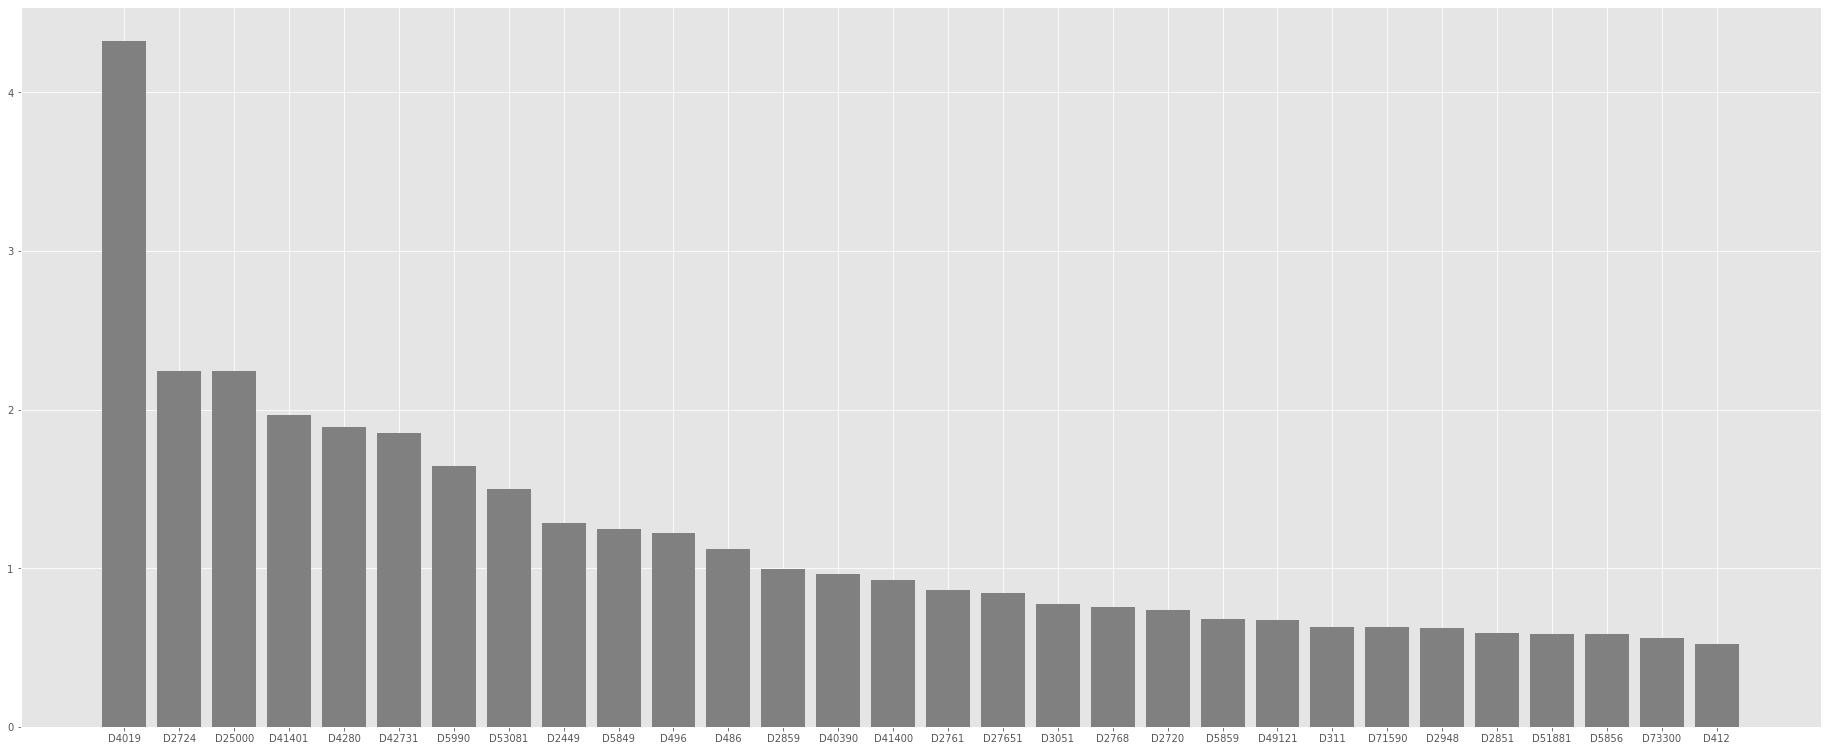

In [ ]:
plot_diagnosis = diagnosis_g1.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_diagnosis['diagnosis'] = 'D' + plot_diagnosis['diagnosis'].astype(str)
plot_diagnosis.sort_values(by=['Percentage'])
ax.bar(plot_diagnosis['diagnosis'],plot_diagnosis['Percentage'], color='grey')
plt.show()

We see that for inpatinet the most common Diagnosis used is 4019, 2724,25000 among others.

# OUTPATIENT (The patients who visits the hospital for treatment but are not admitted)

# Outpatient Procedure Distribution

Find out the common procedure for outpatients.

In [ ]:
procedures1 =  pd.DataFrame(columns = ['Procedures'])
procedures1['Procedures'] = pd.concat([
                                          Train_Outpatient["ClmProcedureCode_1"], 
                                          Train_Outpatient["ClmProcedureCode_2"], 
                                          Train_Outpatient["ClmProcedureCode_3"], 
                                          Train_Outpatient["ClmProcedureCode_4"], 
                                          Train_Outpatient["ClmProcedureCode_5"], 
                                          Train_Outpatient["ClmProcedureCode_6"]
                                          ], axis=0, sort=True).dropna()
                            
procedures1.head(10)
procedure1_group = procedures1['Procedures'].value_counts()

procedure_g2 = procedure1_group.to_frame()
procedure_g2.columns = ['count']
procedure_g2['Procedure'] = procedure_g2.index
procedure_g2['Percentage'] = (procedure_g2['count']/sum(procedure_g2['count']))*100

In [ ]:
procedure_g2.head()

,count,Procedure,Percentage
9904.0,15,9904.0,7.352941
3722.0,8,3722.0,3.921569
4516.0,8,4516.0,3.921569
2724.0,7,2724.0,3.431373
66.0,7,66.0,3.431373


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


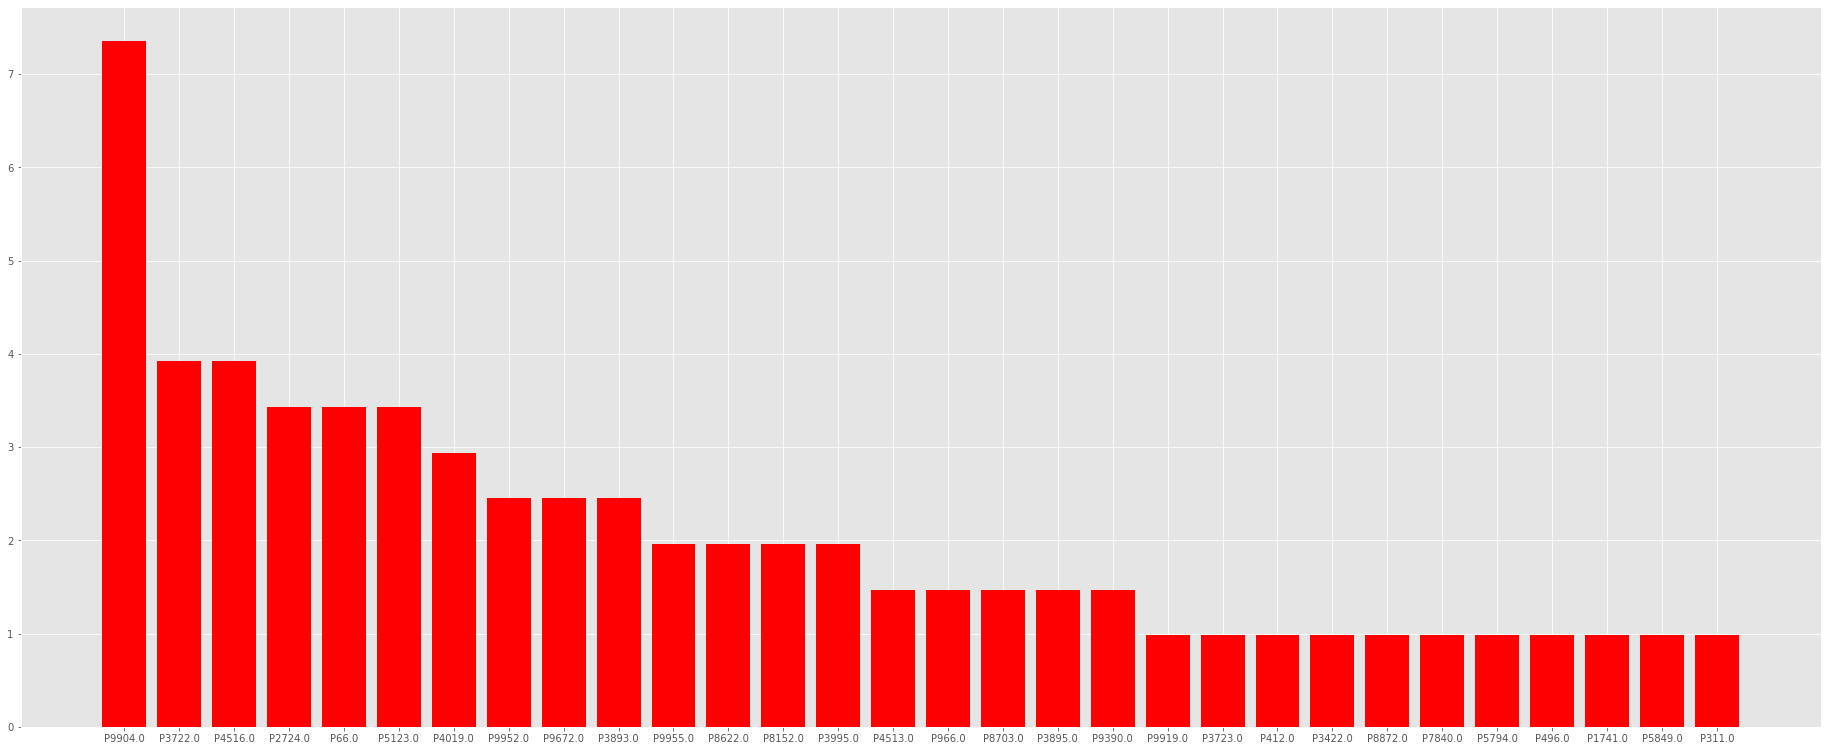

In [ ]:
plot_procedure1 = procedure_g2.head(30)

fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])

plot_procedure1['Procedure'] = 'P' + plot_procedure1['Procedure'].astype(str)
plot_procedure1.sort_values(by=['Percentage'])
ax.bar(plot_procedure1['Procedure'],plot_procedure1['Percentage'], color='red')
plt.show()

We can see that in the case of outpatients there is a little bit of difference in the common procedures.

We see that for the outpatinet the most common procedure used is 9904, 3722, 4516 among others.

# Outpatient Diagnosis Distribution

In [ ]:
diagnosis1 =  pd.DataFrame(columns = ['diagnosis'])
diagnosis1['diagnosis'] = pd.concat([
                                          Train_Outpatient["ClmDiagnosisCode_1"], 
                                          Train_Outpatient["ClmDiagnosisCode_2"], 
                                          Train_Outpatient["ClmDiagnosisCode_3"], 
                                          Train_Outpatient["ClmDiagnosisCode_4"],
                                          Train_Outpatient["ClmDiagnosisCode_5"],
                                          Train_Outpatient["ClmDiagnosisCode_6"],
                                          Train_Outpatient["ClmDiagnosisCode_7"],
                                          Train_Outpatient["ClmDiagnosisCode_8"], 
                                          Train_Outpatient["ClmDiagnosisCode_9"], 
                                          Train_Outpatient["ClmDiagnosisCode_10"]
                                          ], axis=0, sort=True).dropna()
                            
diagnosis_group1 = diagnosis1['diagnosis'].value_counts()

diagnosis_g2 = diagnosis_group1.to_frame()
diagnosis_g2.columns = ['count']
diagnosis_g2['diagnosis'] = diagnosis_g2.index
diagnosis_g2['Percentage'] = (diagnosis_g2['count']/sum(diagnosis_g2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


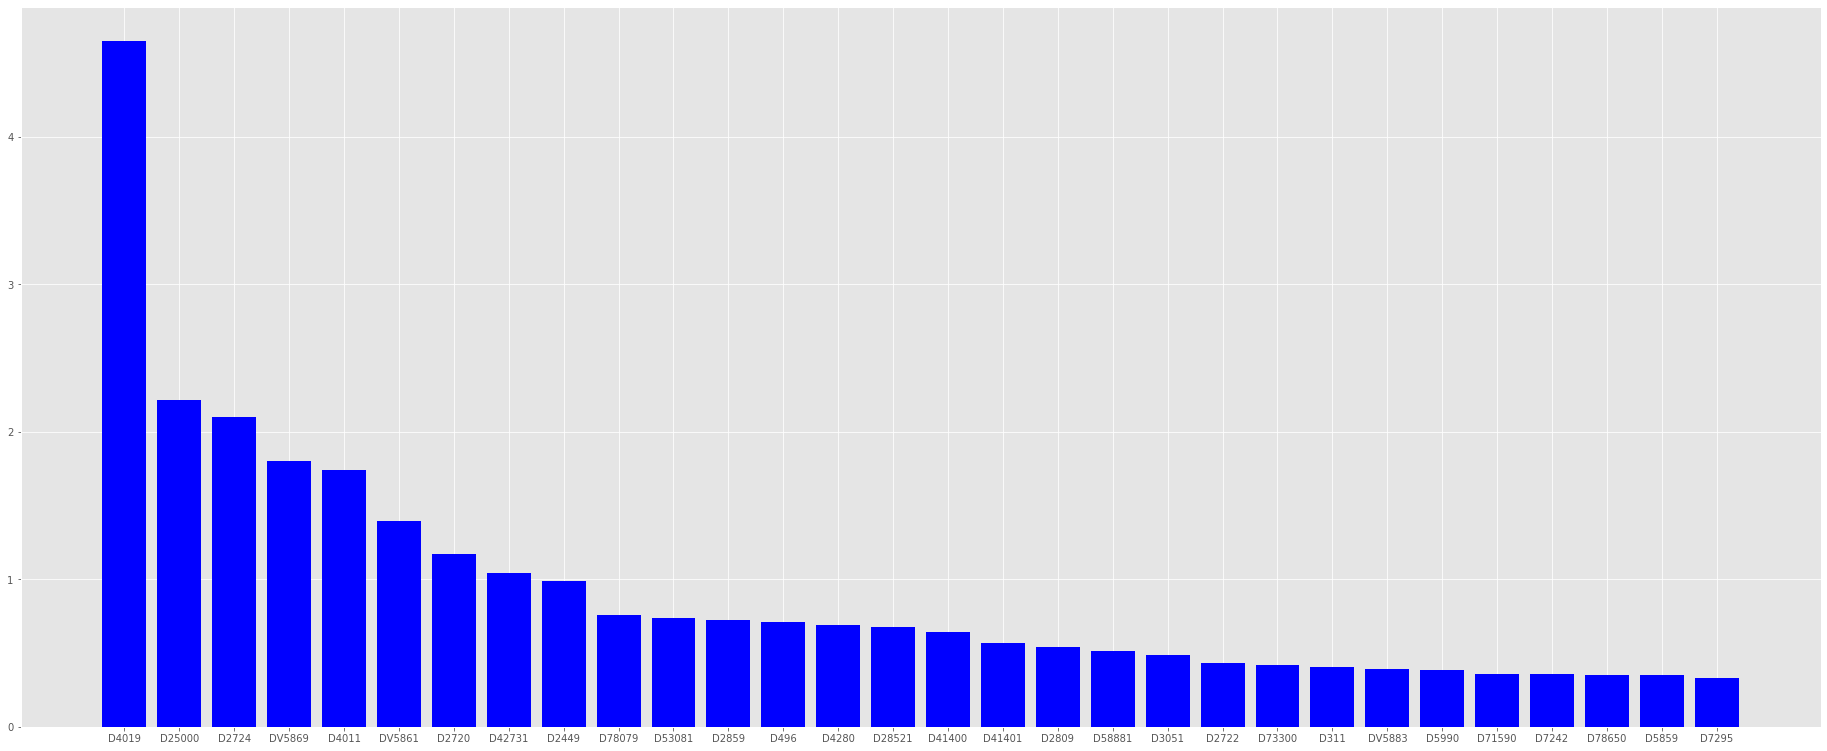

In [ ]:
plot_diagnosis1 = diagnosis_g2.head(30)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_diagnosis1['diagnosis'] = 'D' + plot_diagnosis1['diagnosis'].astype(str)
plot_diagnosis1.sort_values(by=['Percentage'])
ax.bar(plot_diagnosis1['diagnosis'],plot_diagnosis1['Percentage'], color='blue')
plt.show()

For diagnosis, the most common ones are 4019, 25000, 2724 among others

# Now, let's find out what are the common procedures and diagnosis codes performed by the potential fradulent providers

In [ ]:
len(Train_Inpatient)

40474

In [ ]:
Train_fraud =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_fraud = Train.loc[(Train['PotentialFraud'] == 'Yes')]
fraud_provider_ip_df = pd.merge(Train_Inpatient, Train_fraud, how='inner', on='Provider')
len(fraud_provider_ip_df)

23402

In [ ]:
print((len(fraud_provider_ip_df)/len(Train_Inpatient)) * 100, ' %')

57.81983495577408  %


##  So out of 40474 there are 23402 inpatients cases that the potential fradulent providers have interacted with at one point or the other during their services at the hospital. 

## This is around 58% of the cases which we have in our inpatient data.

In [ ]:
len(Train_Outpatient)
fraud_provider_op_df = pd.merge(Train_Outpatient, Train_fraud, how='inner', on='Provider')
len(fraud_provider_op_df)

189394

In [ ]:
print((len(fraud_provider_op_df)/len(Train_Outpatient))*100, ' %')

36.58112130290089  %


## Around 36% potential fradulent activities for Outpatient

# INPATIENT

## Common Procedures (Potential fradulent encounters)

In [ ]:
procedures2 =  pd.DataFrame(columns = ['Procedures'])
procedures2['Procedures'] = pd.concat([
                                      fraud_provider_ip_df["ClmProcedureCode_1"], 
                                      fraud_provider_ip_df["ClmProcedureCode_2"], 
                                      fraud_provider_ip_df["ClmProcedureCode_3"], 
                                      fraud_provider_ip_df["ClmProcedureCode_4"], 
                                      fraud_provider_ip_df["ClmProcedureCode_5"], 
                                      fraud_provider_ip_df["ClmProcedureCode_6"]
                        ], axis=0, sort=True).dropna()

procedures2['Procedures'].head(10)
grouped_F_procedure = procedures2['Procedures'].value_counts()

In [ ]:
grouped_F_procedure2 = grouped_F_procedure.to_frame()
grouped_F_procedure2.columns = ['count']
grouped_F_procedure2['Procedure'] = grouped_F_procedure2.index
grouped_F_procedure2['Percentage'] = (grouped_F_procedure2['count']/sum(grouped_F_procedure2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


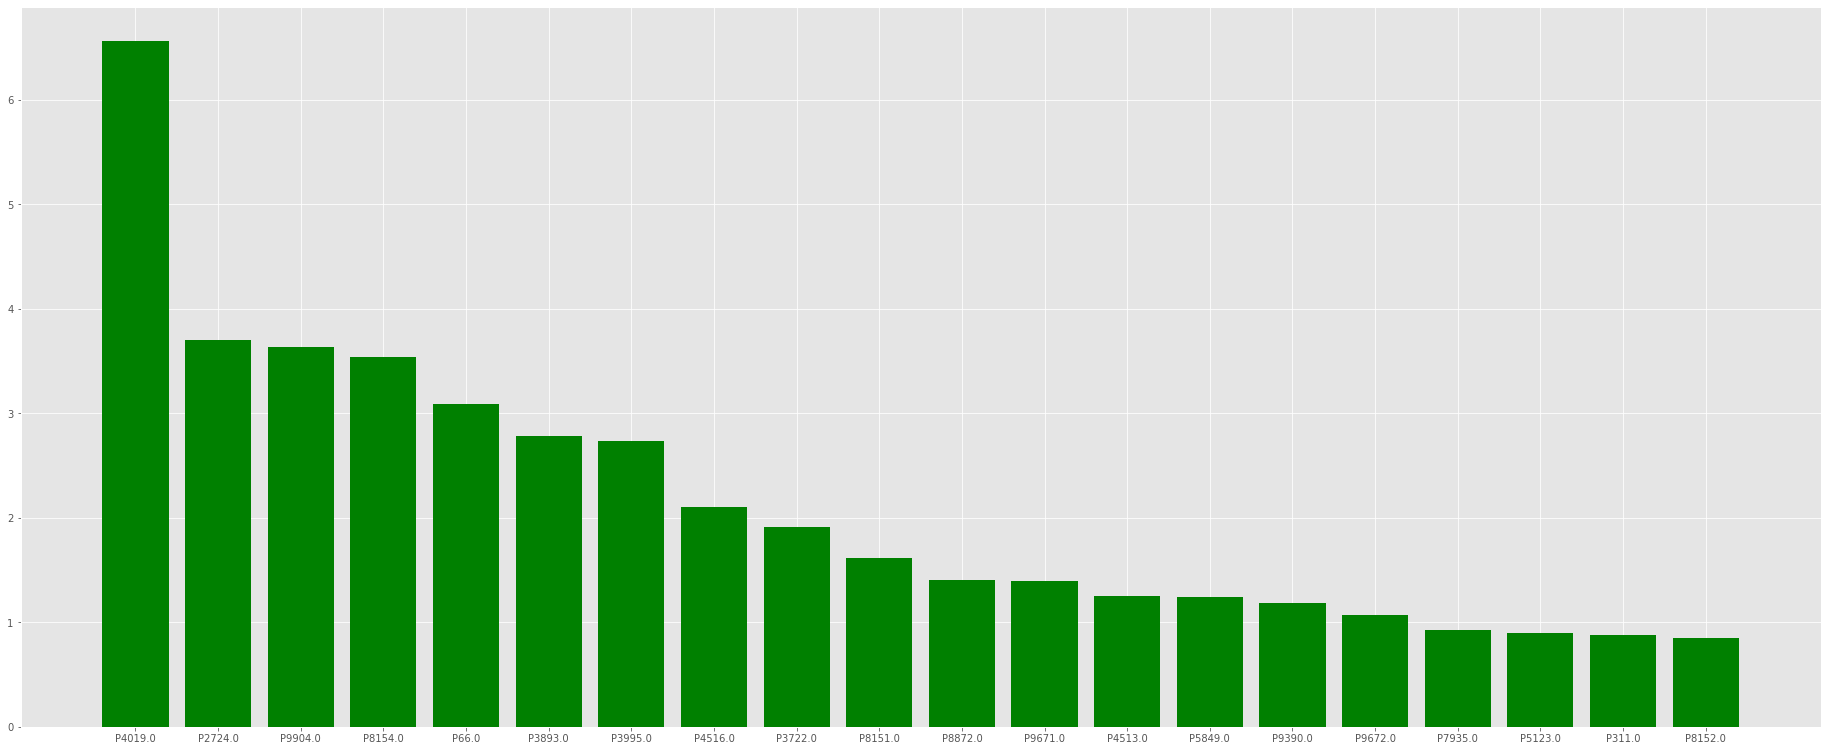

In [ ]:
plot_F_procedure = grouped_F_procedure2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_procedure['Procedure'] = 'P' + plot_F_procedure['Procedure'].astype(str)
plot_F_procedure.sort_values(by=['Percentage'])
ax.bar(plot_F_procedure['Procedure'],plot_F_procedure['Percentage'], color='green')
plt.show()

The common procedures are 4019, 2734, 9904 among others.

## Common Diagnosis (Potential fradulent encounters)

In [ ]:
diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
diagnosis2['Diagnosis'] = pd.concat([
                                        fraud_provider_ip_df["ClmDiagnosisCode_1"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_2"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_3"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_4"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_5"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_6"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_7"],  
                                        fraud_provider_ip_df["ClmDiagnosisCode_8"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_9"], 
                                        fraud_provider_ip_df["ClmDiagnosisCode_10"]
                                        ], axis=0, sort=True).dropna()
diagnosis2['Diagnosis'].head(10)
grouped_F_diagnosis = diagnosis2['Diagnosis'].value_counts()

In [ ]:
grouped_F_diagnosis2 = grouped_F_diagnosis.to_frame()
grouped_F_diagnosis2.columns = ['count']
grouped_F_diagnosis2['Diagnosis'] = grouped_F_diagnosis2.index
grouped_F_diagnosis2['Percentage'] = (grouped_F_diagnosis2['count']/sum(grouped_F_diagnosis2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


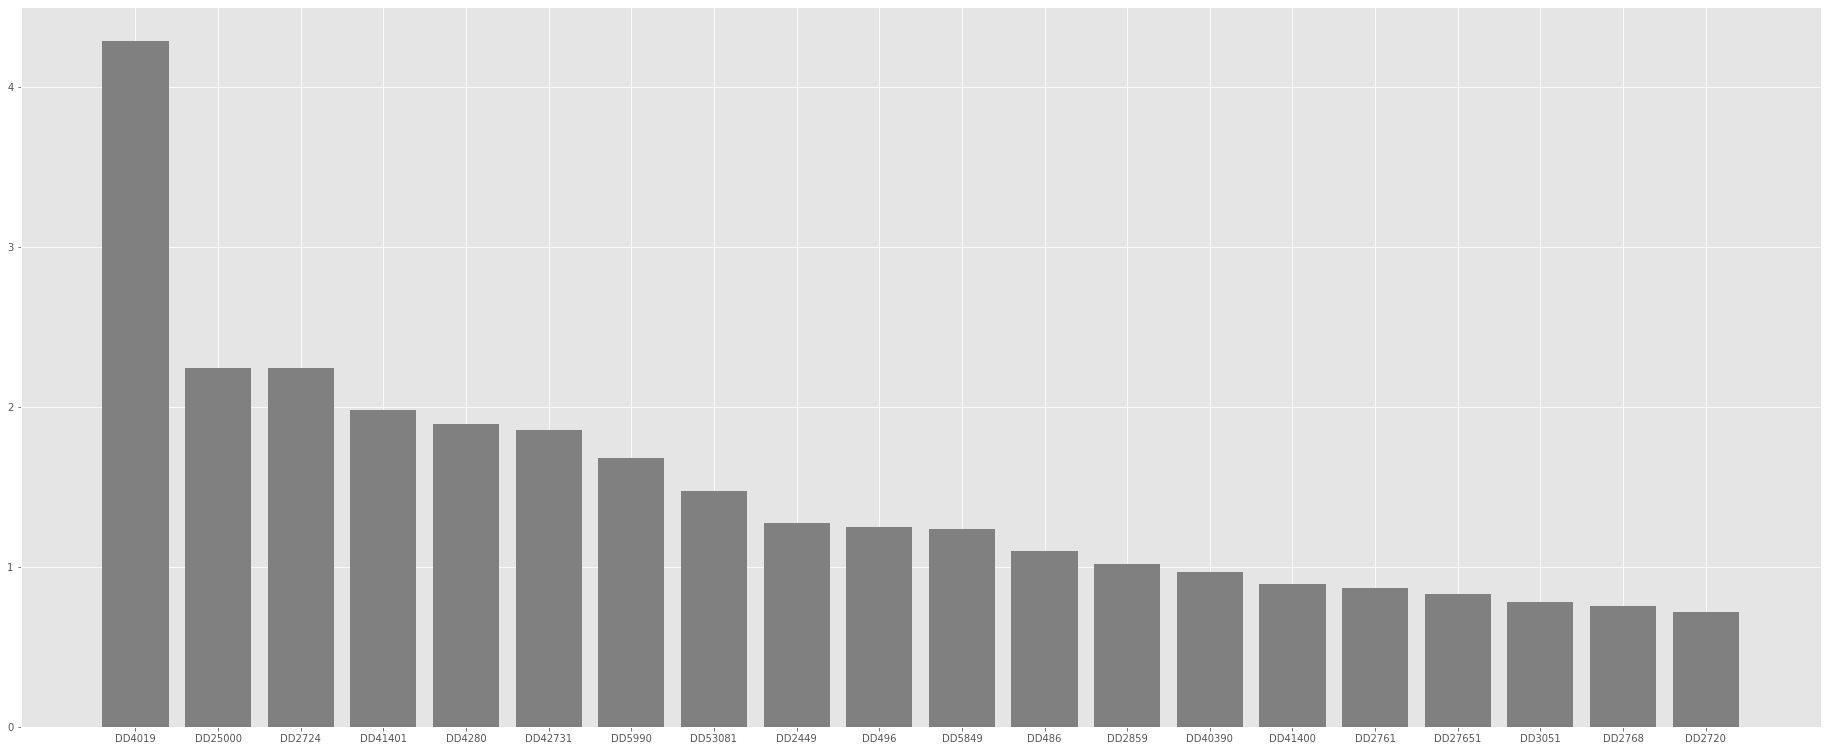

In [ ]:
plot_F_diagnosis = grouped_F_diagnosis2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_diagnosis['Diagnosis'] = 'D' + plot_F_diagnosis['Diagnosis'].astype(str)
plot_F_diagnosis.sort_values(by=['Percentage'])
ax.bar(plot_F_diagnosis['Diagnosis'],plot_F_diagnosis['Percentage'], color='grey')
plt.show()

It is the same as the usual common diagnosis

# OUTPATIENT

## Common Procedure (Potential fradulent encounters)

In [ ]:
procedures2 =  pd.DataFrame(columns = ['Procedures'])
procedures2['Procedures'] = pd.concat([
                                             fraud_provider_op_df["ClmProcedureCode_1"], 
                                             fraud_provider_op_df["ClmProcedureCode_2"], 
                                             fraud_provider_op_df["ClmProcedureCode_3"], 
                                             fraud_provider_op_df["ClmProcedureCode_4"], 
                                             fraud_provider_op_df["ClmProcedureCode_5"], 
                                             fraud_provider_op_df["ClmProcedureCode_6"]
                                             ], axis=0, sort=True).dropna()
procedures2['Procedures'].head(10)
grouped_F_procedure2 = procedures2['Procedures'].value_counts()

In [ ]:
grouped_F_procedure_opdf2 = grouped_F_procedure2.to_frame()
grouped_F_procedure_opdf2.columns = ['count']
grouped_F_procedure_opdf2['Procedure'] = grouped_F_procedure_opdf2.index
grouped_F_procedure_opdf2['Percentage'] = (grouped_F_procedure_opdf2['count']/sum(grouped_F_procedure_opdf2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


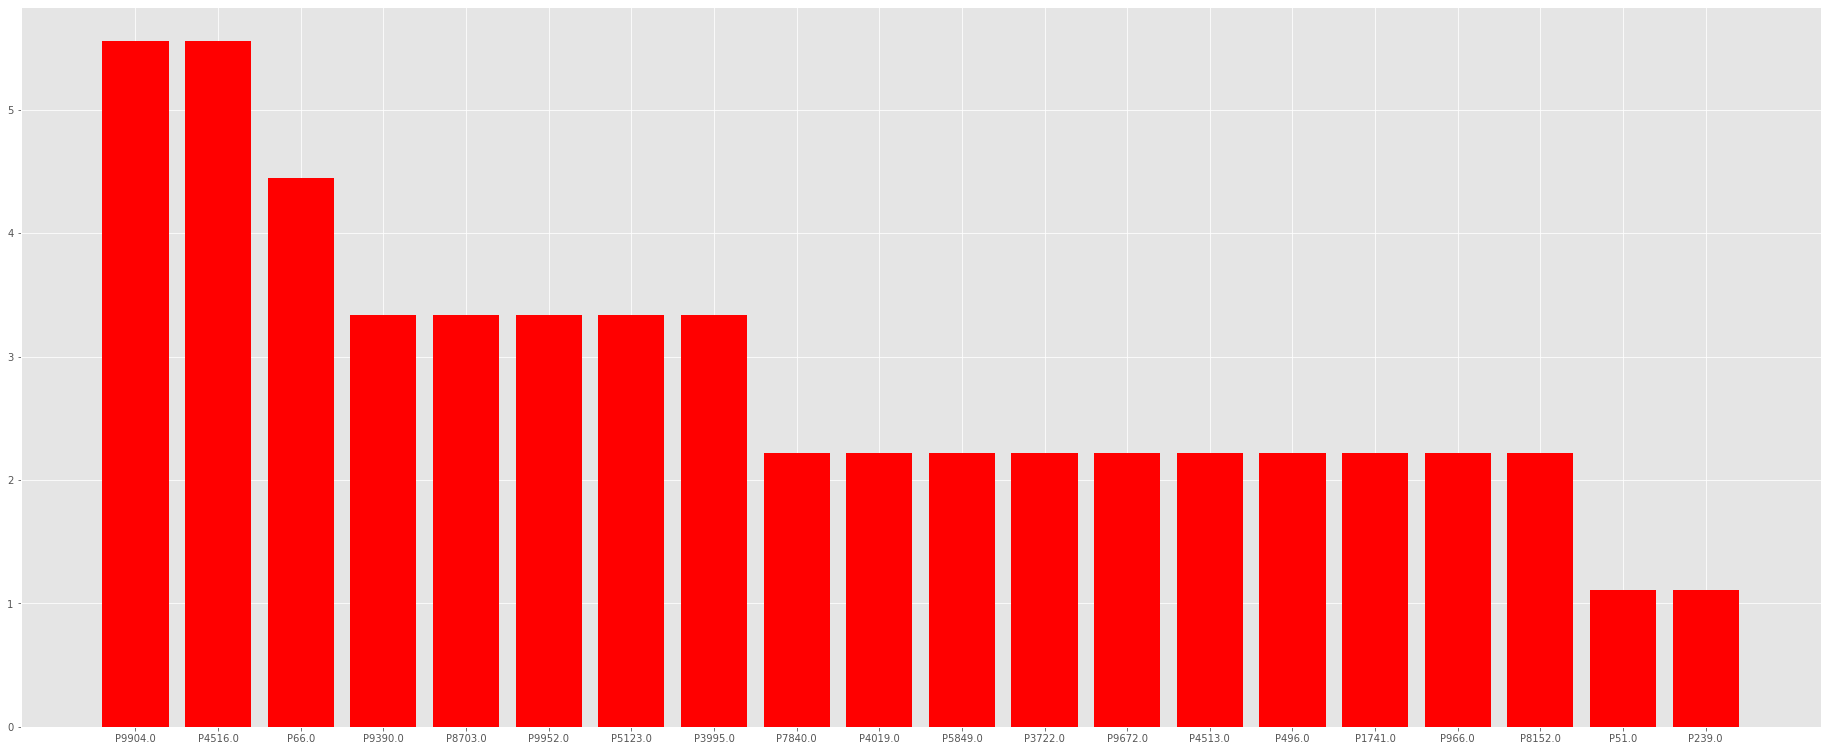

In [ ]:

plot_F_procedure_opdf1 = grouped_F_procedure_opdf2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_procedure_opdf1['Procedure'] = 'P' + plot_F_procedure_opdf1['Procedure'].astype(str)
plot_F_procedure_opdf1.sort_values(by=['Percentage'])
ax.bar(plot_F_procedure_opdf1['Procedure'],plot_F_procedure_opdf1['Percentage'], color='red')
plt.show()

The most common procedure are 9904, 4516 & 66.
These are little bit different than the inpatient data.

# Diagnosis

In [ ]:
diagnosis2 = pd.DataFrame(columns = ['Diagnosis'])
diagnosis2['Diagnosis'] = pd.concat([
                                           fraud_provider_op_df["ClmDiagnosisCode_1"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_2"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_3"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_4"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_5"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_6"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_7"],  
                                           fraud_provider_op_df["ClmDiagnosisCode_8"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_9"], 
                                           fraud_provider_op_df["ClmDiagnosisCode_10"]
                                           ], axis=0, sort=True).dropna()
diagnosis2['Diagnosis'].head(10)
grouped_F_diagnosis2 = diagnosis2['Diagnosis'].value_counts()

In [ ]:
grouped_F_diagnosis_opdf2 = grouped_F_diagnosis2.to_frame()
grouped_F_diagnosis_opdf2.columns = ['count']
grouped_F_diagnosis_opdf2['Diagnosis'] = grouped_F_diagnosis_opdf2.index
grouped_F_diagnosis_opdf2['Percentage'] = (grouped_F_diagnosis_opdf2['count']/sum(grouped_F_diagnosis_opdf2['count']))*100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


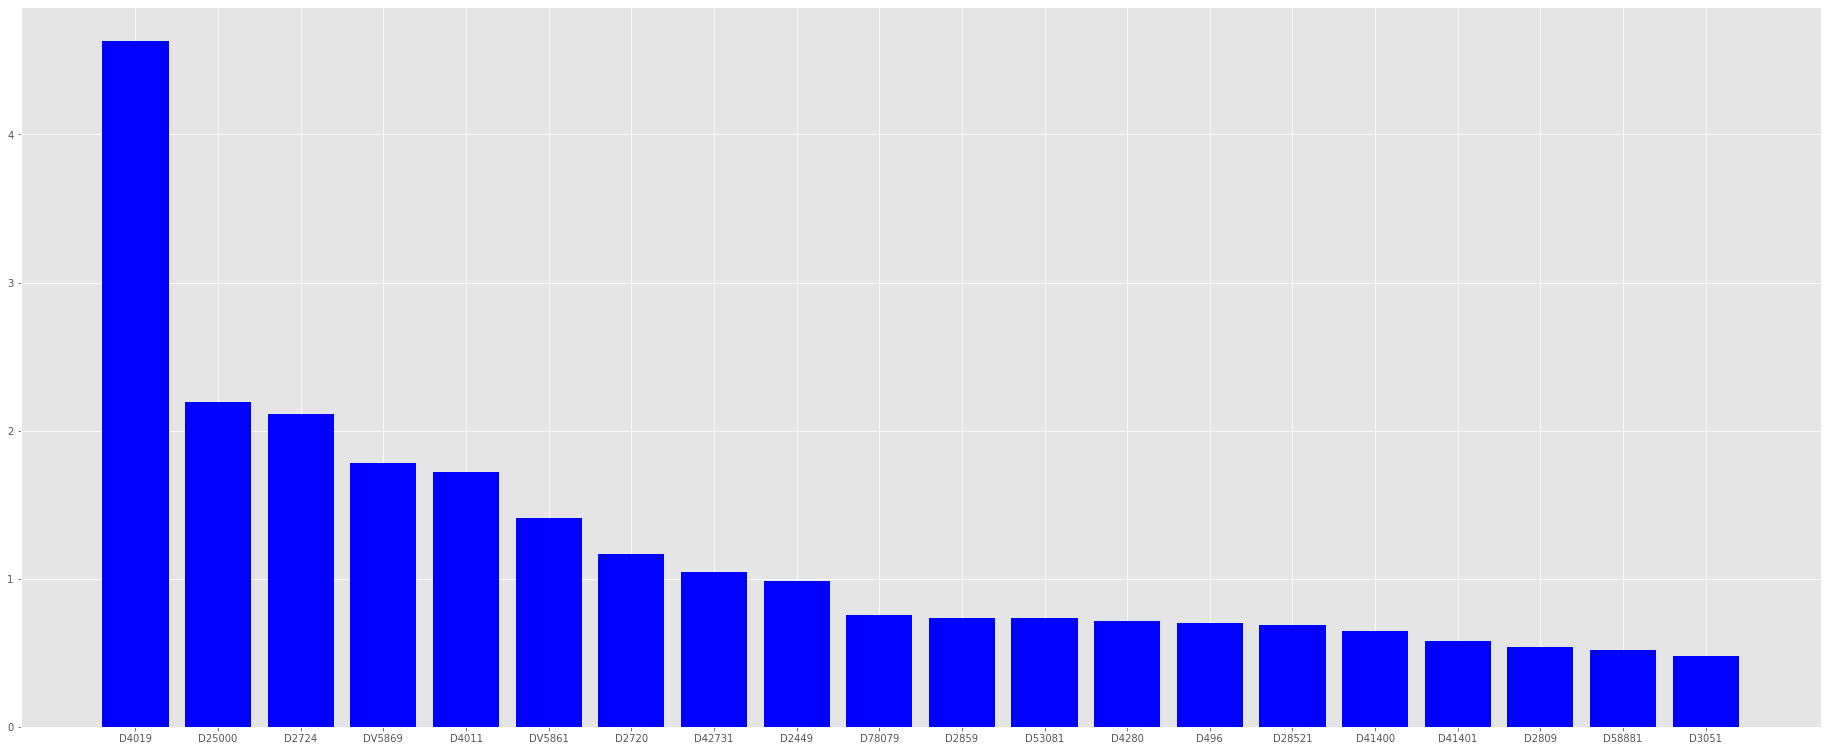

In [ ]:
plot_F_diagnosis_opdf1 = grouped_F_diagnosis_opdf2.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

plot_F_diagnosis_opdf1['Diagnosis'] = 'D' + plot_F_diagnosis_opdf1['Diagnosis'].astype(str)
plot_F_diagnosis_opdf1.sort_values(by=['Percentage'])
ax.bar(plot_F_diagnosis_opdf1['Diagnosis'],plot_F_diagnosis_opdf1['Percentage'], color='blue')
plt.show()

For diagnosis the data is almost same.

# Let's find out the States having the highest number of potential frauds

In [ ]:
fraud_beneficiary_ip_op_df = pd.merge(Train_Beneficiary, fraud_provider_ip_df, how='inner', on='BeneID')
fraud_beneficiary_ip_op_df = pd.merge(Train_Beneficiary, fraud_provider_op_df, how='inner', on='BeneID')
Train_F_Beneficiary_grouped = fraud_beneficiary_ip_op_df['State'].value_counts()
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped.to_frame()
Train_F_Beneficiary_grouped1['Count'] =  Train_F_Beneficiary_grouped1['State']
Train_F_Beneficiary_grouped1['STATE'] = Train_F_Beneficiary_grouped1.index
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.drop(['State'], axis = 1)

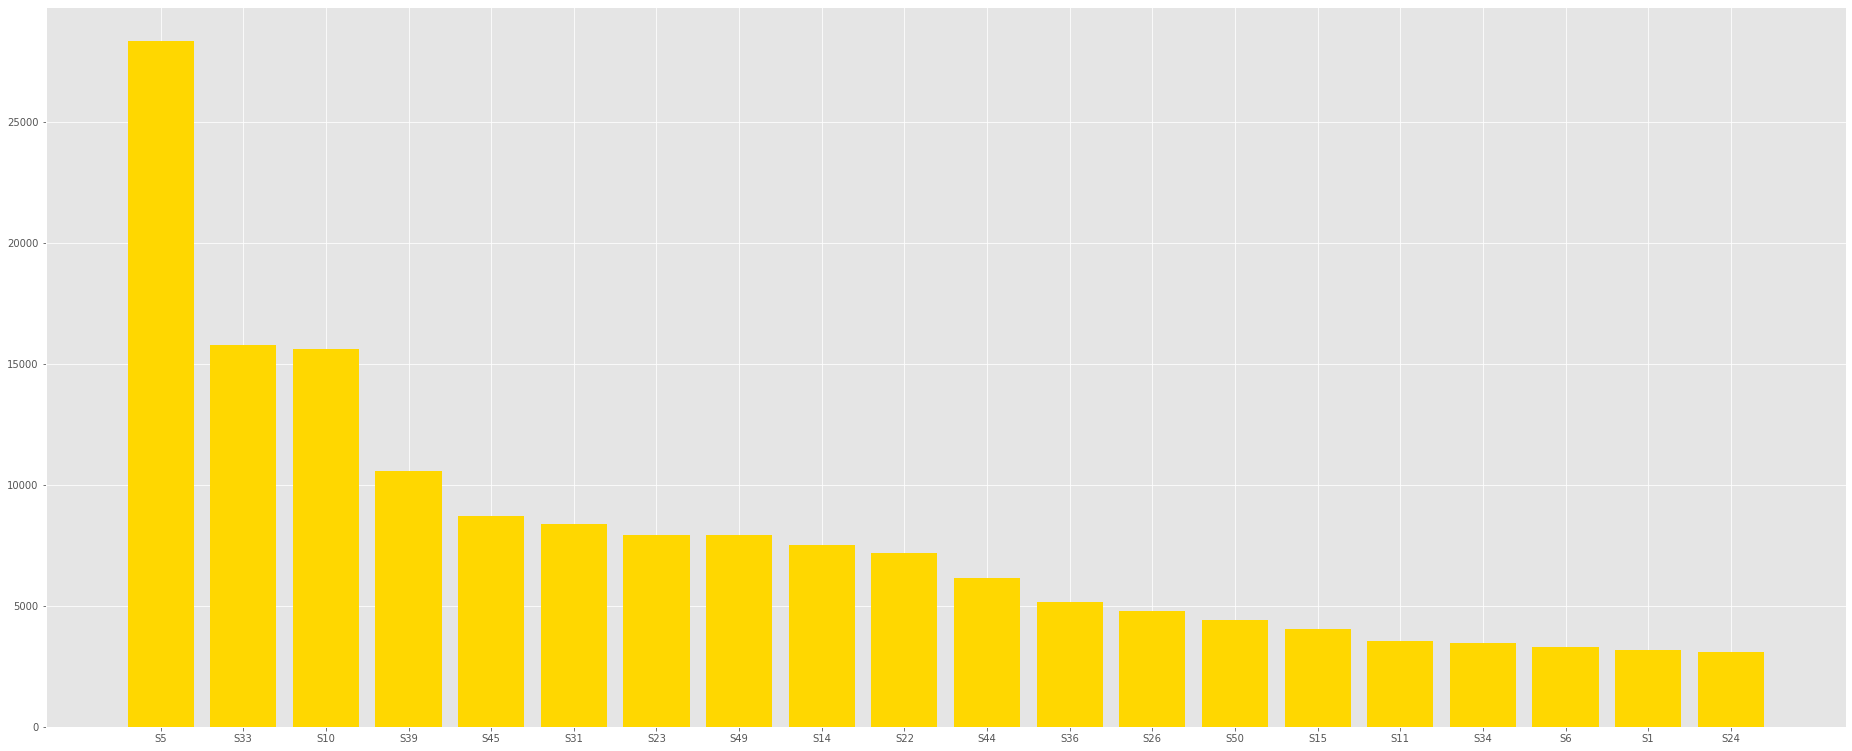

In [ ]:
Train_F_Beneficiary_grouped1 = Train_F_Beneficiary_grouped1.head(20)

fig = plt.figure(figsize=(25,10),)
ax = fig.add_axes([0,0,1,1])

Train_F_Beneficiary_grouped1['STATE'] = 'S' + Train_F_Beneficiary_grouped1['STATE'].astype(str)
ax.bar(Train_F_Beneficiary_grouped1['STATE'],Train_F_Beneficiary_grouped1['Count'], color='gold')
plt.show()

We can see that the state code 5 has the highest number of Potential fradulent cases. The difference the highest and 2nd highest one is huge.

# Let's do the age distribution for the probable fradulent activites 

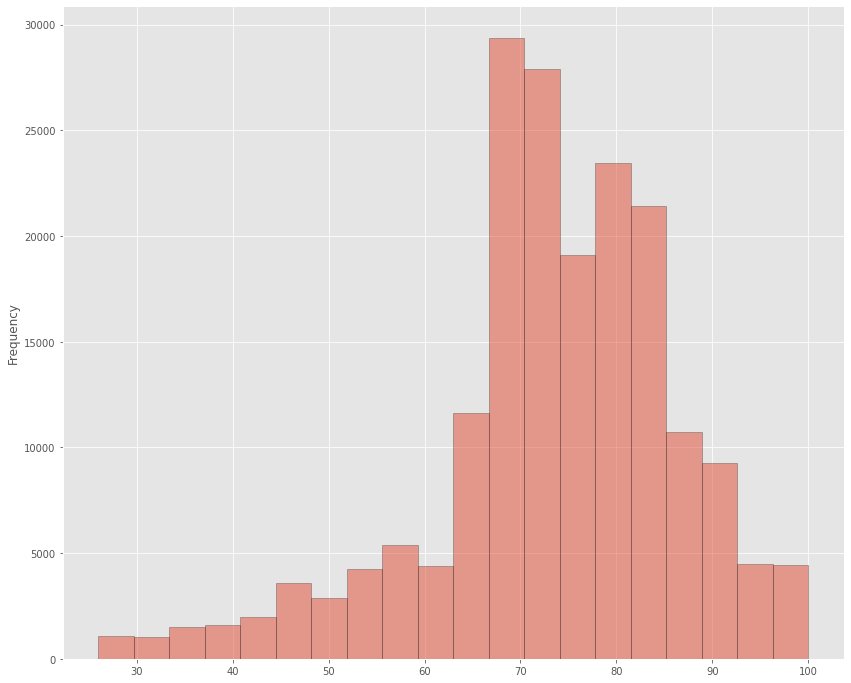

In [ ]:
import seaborn as sns

fraud_beneficiary_ip_op_df['DOB'] =  pd.to_datetime(fraud_beneficiary_ip_op_df['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
fraud_beneficiary_ip_op_df['DOB'] = fraud_beneficiary_ip_op_df['DOB'].where(fraud_beneficiary_ip_op_df['DOB'] < now, fraud_beneficiary_ip_op_df['DOB'] -  np.timedelta64(100, 'Y'))   # 2
fraud_beneficiary_ip_op_df['age'] = (now - fraud_beneficiary_ip_op_df['DOB']).astype('<m8[Y]')    # 3
ax = fraud_beneficiary_ip_op_df['age'].plot.hist(bins=20, alpha=0.5, figsize=(14, 12), edgecolor='k')

This seems logical as most of the patients are of an age >65

# Age distribution for Whole Inpatient data (Fradulent and imfradulent both)


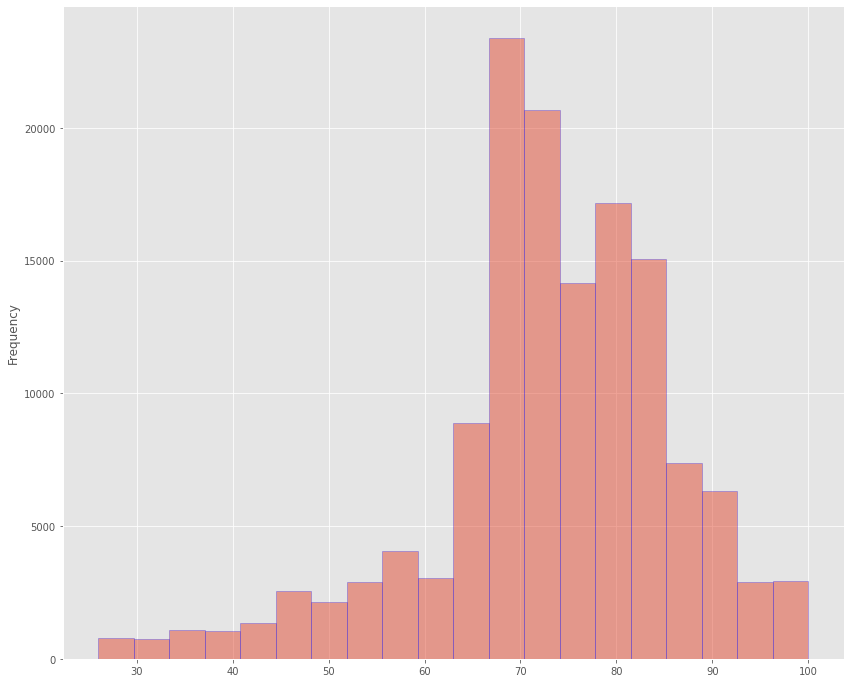

In [ ]:
Train_Beneficiary['DOB'] =  pd.to_datetime(Train_Beneficiary['DOB'], format='%Y-%m-%d')  
now = pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') # Assuming this is 2009 data as the last recorded death is for 2009
Train_Beneficiary['DOB'] = Train_Beneficiary['DOB'].where(Train_Beneficiary['DOB'] < now, Train_Beneficiary['DOB'] -  np.timedelta64(100, 'Y'))   # 2
Train_Beneficiary['age'] = (now - Train_Beneficiary['DOB']).astype('<m8[Y]')    # 3
ax = Train_Beneficiary['age'].plot.hist(bins=20, alpha=0.5, figsize=(14, 12), edgecolor='b')

We can see the same pattern in the whole data.

# Cost Distribution for INPATIENT data

What is the average cost of potential fraud claims and also what is the cost as a whole?

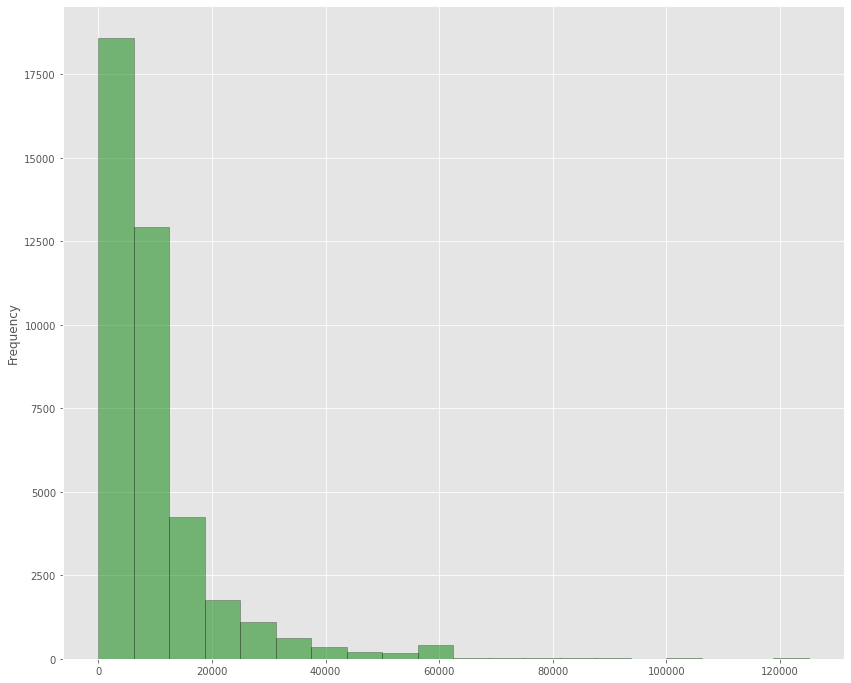

In [ ]:
ax = Train_Inpatient['InscClaimAmtReimbursed'].plot.hist(bins=20, alpha=0.5, figsize=(14, 12), facecolor='g', edgecolor='k')

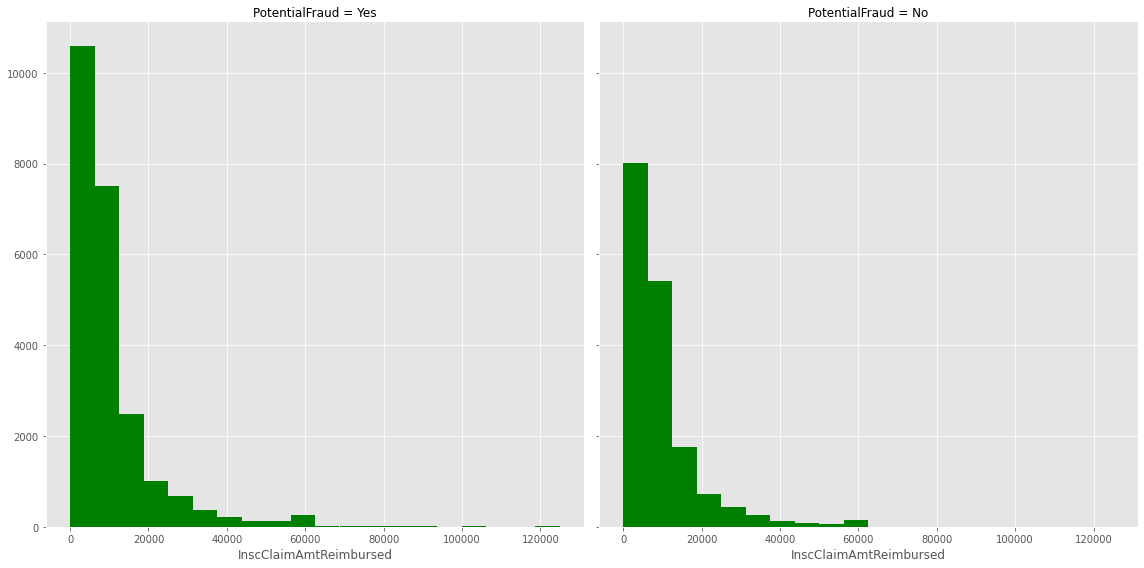

In [ ]:
Train_Inpatient_1 = pd.merge(Train_Inpatient, Train, how='inner', on='Provider')
g = sns.FacetGrid(Train_Inpatient_1, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, color = 'g')

We see that it is a significantly large amount which might be fradulent.
This can make a huge loss of the industry.

# Total amount suspected for fraud

In [ ]:
Train_Inpatient_1 = Train_Inpatient_1.loc[(Train_Inpatient_1['PotentialFraud'] == 'Yes')]
Total = Train_Inpatient_1['InscClaimAmtReimbursed'].sum()
print('$',Total)

$ 241288510


Around 241288510 dollars worth of claim might have some fradulent activity. Even if we assume that it has just 10% fradulent activity the amount will be quite huge

# Cost Distribution for OUTPATIENT data

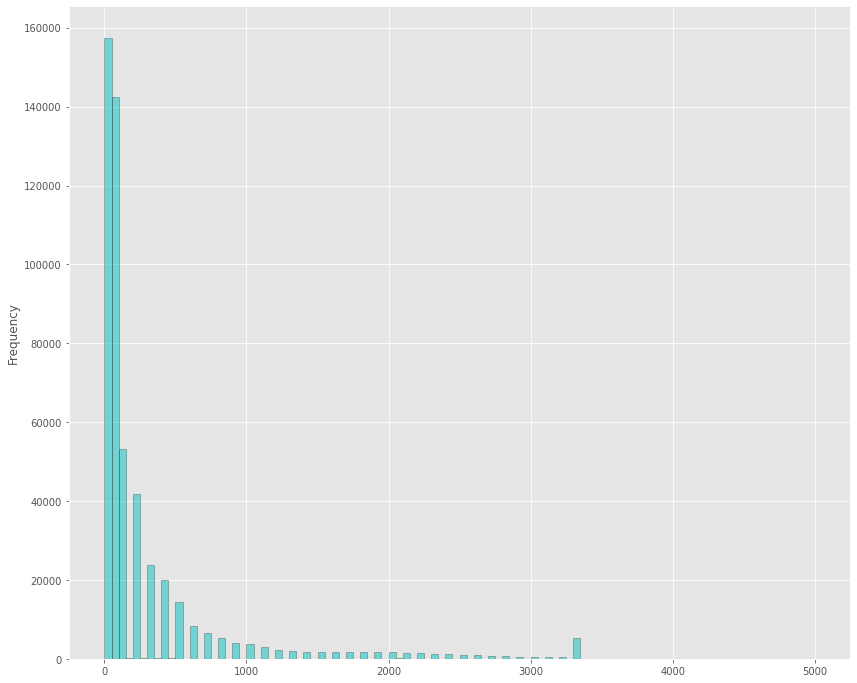

In [ ]:
ax = Train_Outpatient['InscClaimAmtReimbursed'].plot.hist(bins=100,range=[0, 5000], alpha=0.5, figsize=(14, 12), facecolor='c', edgecolor='k')

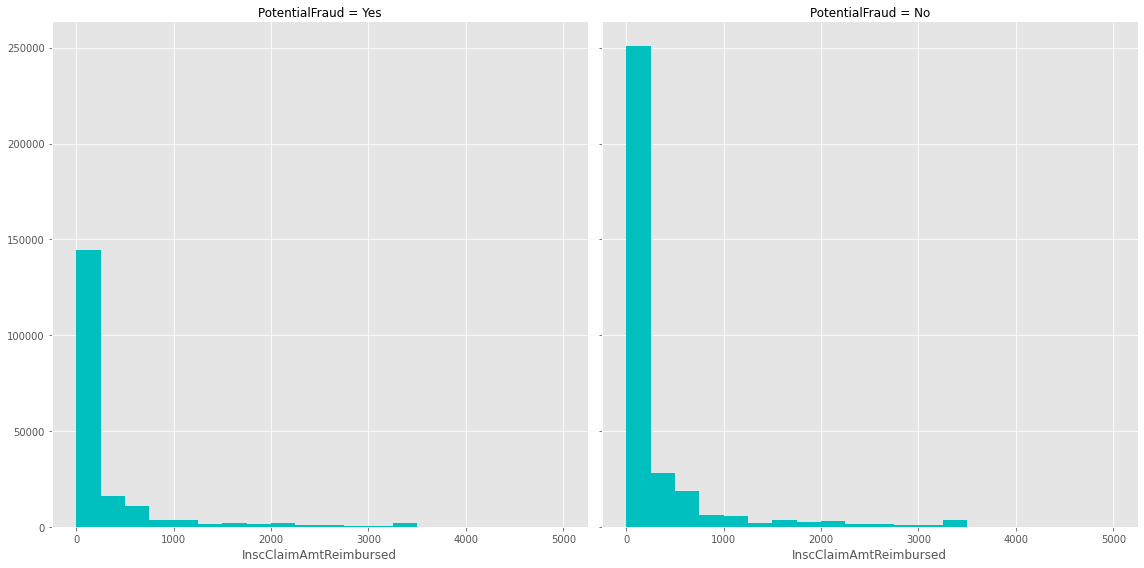

In [ ]:
Train_Outpatient_1 = pd.merge(Train_Outpatient, Train, how='inner', on='Provider')
g = sns.FacetGrid(Train_Outpatient_1, col='PotentialFraud', height=8)
g.map(plt.hist, 'InscClaimAmtReimbursed', bins=20, range=[0, 5000], color ='c')

It makes sense as most of the outpatient claims are of a smaller amount



# Checking for missing values in the data set

In [ ]:
Train_Beneficiary.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

137135 empty beneficiary death data, which means they are alive

## Adding age column

In [ ]:
Train_Beneficiary['DOB'] = pd.to_datetime(Train_Beneficiary['DOB'] , format = '%Y-%m-%d')
Train_Beneficiary['DOD'] = pd.to_datetime(Train_Beneficiary['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiary['Age'] = round(((Train_Beneficiary['DOD'] - Train_Beneficiary['DOB']).dt.days)/365)


In [ ]:
Test_Beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,1,1,2,2,2,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,2,1,2,1,1,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,2,1,1,2,1,1,2,1,2,2,2,21260,2136,120,100


# As data is of year 2009,  Calculating age of beneficiaries

In [ ]:
Train_Beneficiary.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiary['DOB']).dt.days)/365),inplace=True)

In [ ]:
Train_Inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


# Creating Master DataFrame

In [ ]:
Train_Inpatient['EncounterType'] = 0
Train_Outpatient['EncounterType'] = 1
frames = [Train_Inpatient, Train_Outpatient]
TrainInAndOut = pd.concat(frames)
TrainInAndOutBenf = pd.merge(TrainInAndOut, Train_Beneficiary, how='inner', on='BeneID')
Master_df = pd.merge(TrainInAndOutBenf, Train, how='inner', on='Provider')

In [ ]:
Master_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,EncounterType,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,age,Age,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1943-01-01,NaT,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70,66.0,67.0,Yes
1,BENE16973,CLM565430,2009-09-06,2009-09-06,PRV55912,50,PHY365867,PHY327147,NaN,NaN,NaN,0.0,NaN,NaN,V7183,53081,78959,4280,E8788,78079,79902,25002,71848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1932-05-01,NaT,1,1,0,39,310,12,12,1,1,1,2,2,2,2,1,2,2,2,24000,2136,450,200,77.0,78.0,Yes
2,BENE17521,CLM34721,2009-01-20,2009-02-01,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,4240,2639,2948,40390,45821,28489,5854,2753,E9305,NaN,7769.0,5849.0,NaN,NaN,NaN,NaN,0,1913-12-01,NaT,2,1,0,39,230,12,12,1,1,1,2,1,2,2,1,2,2,2,19000,1068,100,20,96.0,96.0,Yes
3,BENE21718,CLM72336,2009-10-17,2009-11-04,PRV55912,17000,PHY334706,PHY334706,NaN,2009-10-17,V5789,1068.0,2009-11-04,941,V5789,4168,73313,7812,7993,78830,72273,43812,4019,NaN,9338.0,NaN,NaN,NaN,NaN,NaN,0,1922-10-01,NaT,1,1,0,39,600,12,12,2,2,2,2,2,2,2,1,1,2,2,17000,1068,1050,540,87.0,87.0,Yes
4,BENE22934,CLM73394,2009-10-25,2009-10-29,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,71535,71960,4019,V1202,4240,2449,2768,NaN,NaN,NaN,8154.0,NaN,NaN,NaN,NaN,NaN,0,1930-07-01,NaT,2,1,0,39,280,12,12,2,1,2,2,1,2,1,1,1,1,2,27000,2136,450,160,79.0,79.0,Yes


# Remove DOD with IsDead and droping DOB as we have age

In [ ]:
Master_df.loc[Master_df['DOD'].isnull(), 'IsDead'] = '0'
Master_df.loc[(Master_df['DOD'].notnull()), 'IsDead'] = '1'
Master_df = Master_df.drop(['DOD'], axis = 1)
Master_df = Master_df.drop(['DOB'], axis = 1)
Master_df = Master_df.drop(['age'], axis = 1) 


In [ ]:
### Sum all results
df1 = Master_df.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'RenalDiseaseIndicator', 
                                                  'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                                                  'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 
                                                  'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression', 
                                                  'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', 
                                                  'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                  'ChronicCond_stroke' 
                                                  ]].sum()

# Count number of records

In [ ]:
df2 = Master_df[['BeneID', 'ClaimID']].groupby(Master_df['Provider']).nunique().reset_index()

In [ ]:
### Calculate mean
df3 = Master_df.groupby(['Provider'], as_index = False)[['NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
                                                    'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age']].mean()
### Combine all together
df = df2.merge(df1, on='Provider', how='left').merge(df3, on='Provider', how='left')
print(df.shape)

In [ ]:
df1 = df.merge(Train, on='Provider', how='left').drop(['Provider', ], axis = 1)
df2 = df.merge(Train, on='Provider', how='left').drop(['Provider', 'PotentialFraud'], axis = 1)

# Correlation Matrix

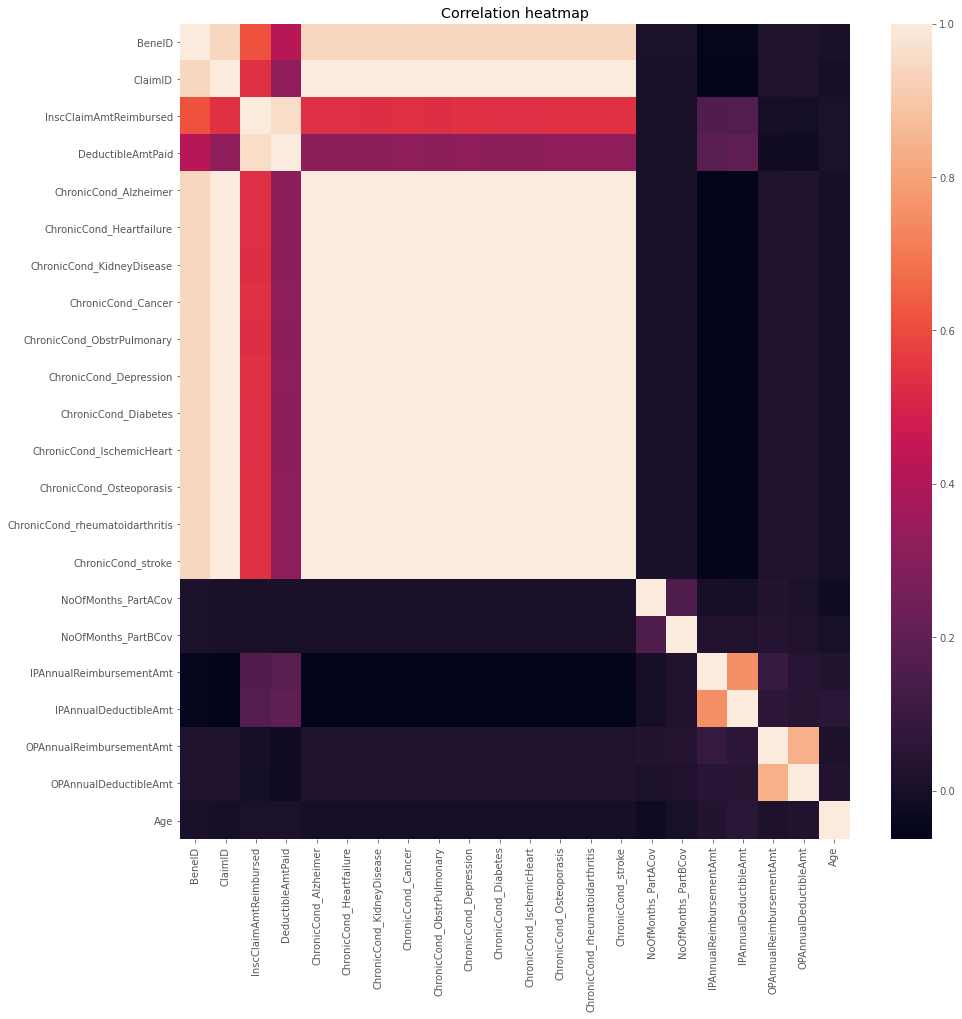

In [ ]:
plt.figure(figsize=(15, 15))
plt.title('Correlation heatmap')
sns.heatmap(df2.corr())
plt.show()